# Credit Score Prediction


## Data Description
- ID: Represents a unique identification of an entry
- Customer_ID: Represents a unique identification of a person
- Month: Represents the month of the year
- Name: Represents the name of a person
- Age: Represents the age of the person
- SSN: Represents the social security number of a person
- Occupation: Represents the occupation of the person
- Annual_Income: Represents the annual income of the person
- Monthly_Inhand_Salary: Represents the monthly base salary of a person
- Num_Bank_Accounts: Represents the number of bank accounts a person holds
- Num_Credit_Card: Represents the number of other credit cards held by a person
- Interest_Rate: Represents the interest rate on credit card
- Num_of_Loan: Represents the number of loans taken from the bank
- Type_of_Loan: Represents the types of loan taken by a person
- Delay_from_due_date: Represents the average number of days delayed from the    payment date
- Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
- Changed_Credit_Limit: Represents the percentage change in credit card limit
- Num_Credit_Inquiries: Represents the number of credit card inquiries
- Credit_Mix: Represents the classification of the mix of credits
- Outstanding_Debt: Represents the remaining debt to be paid
- Credit_Utilization_Ratio: Represents the utilization ratio of credit card
- Credit_History_Age: Represents the age of credit history of the person
- Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
- Total_EMI_per_month: Represents the monthly EMI payments
- Amount_invested_monthly: Represents the monthly amount invested by the customer
- Payment_Behaviour: Represents the payment behavior of the customer
- Monthly_Balance:Represents the monthly balance amount of the customer
- Credit_Score:Represents the bracket of credit score (Poor, Standard, Good) ((Target))


In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [92]:
df=pd.read_csv("/home/kartik/Documents/DBDA_PROJECT/credit/archive/train.csv");

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3526: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [94]:
df.shape

(100000, 28)

In [95]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [96]:
df.isnull().sum()/len(df)*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [97]:
dfnew=df.dropna()
dfnew

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [98]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53049 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        53049 non-null  object 
 1   Customer_ID               53049 non-null  object 
 2   Month                     53049 non-null  object 
 3   Name                      53049 non-null  object 
 4   Age                       53049 non-null  object 
 5   SSN                       53049 non-null  object 
 6   Occupation                53049 non-null  object 
 7   Annual_Income             53049 non-null  object 
 8   Monthly_Inhand_Salary     53049 non-null  float64
 9   Num_Bank_Accounts         53049 non-null  int64  
 10  Num_Credit_Card           53049 non-null  int64  
 11  Interest_Rate             53049 non-null  int64  
 12  Num_of_Loan               53049 non-null  object 
 13  Type_of_Loan              53049 non-null  object 
 14  Delay_

In [99]:
data_lost=(len(df)-len(dfnew))*100/len(df)
f"Data Lost-{data_lost:0.2f} %"

'Data Lost-46.95 %'

In [100]:
df.drop("Name",axis=1,inplace=True)


In [101]:
df.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Age                       100000 non-null  object 
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  object 
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  in

In [103]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


<Axes: >

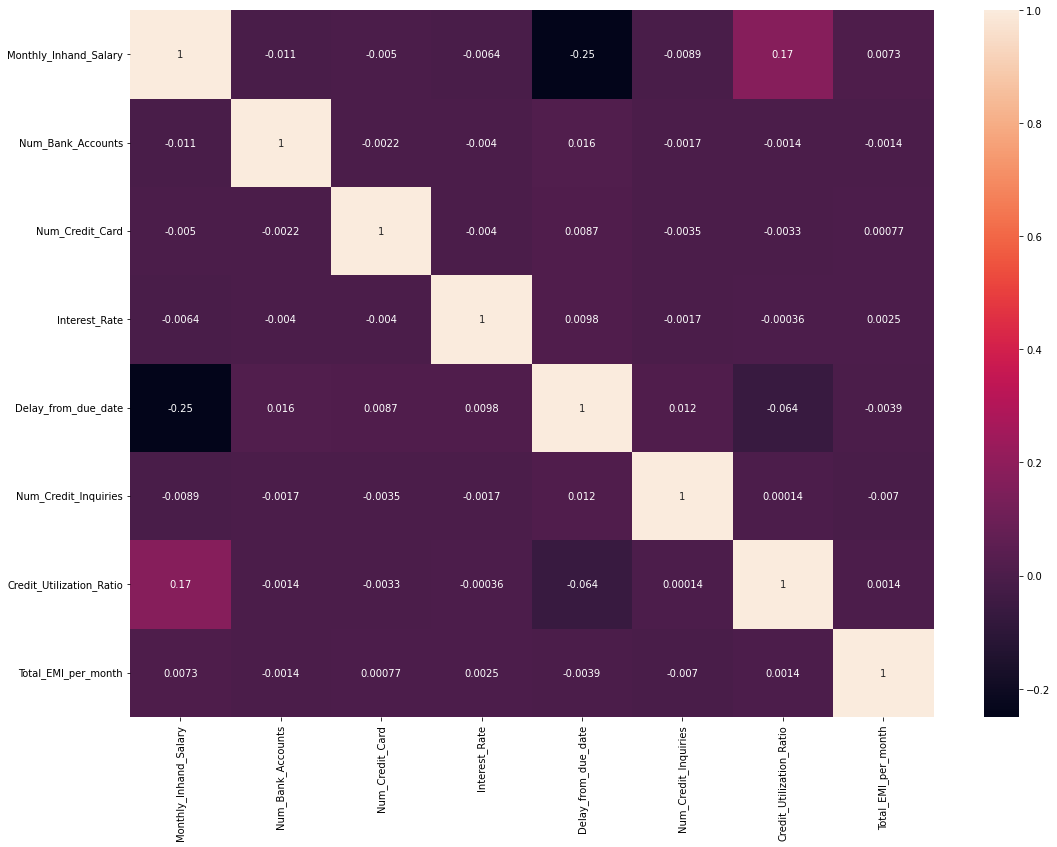

In [104]:
plt.figure(figsize=(18,13))
sns.heatmap(df.corr(),annot=True)

In [105]:
# sns.pairplot(df)

In [106]:
df["Credit_Score"]

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object

In [107]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["credit__score_label"]=lb.fit_transform(df["Credit_Score"])

good=0
standard=2
poor=1

In [108]:
df.drop("Credit_Score",axis=1,inplace=True)

<Axes: >

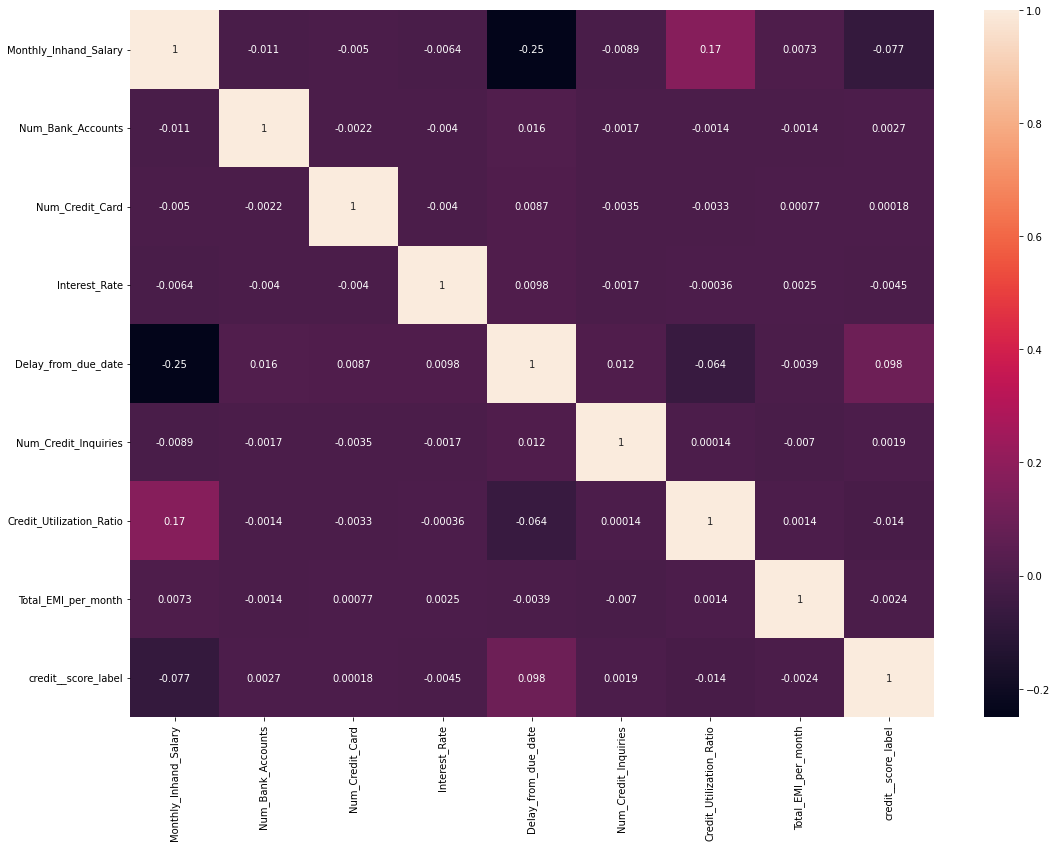

In [109]:
plt.figure(figsize=(18,13))
sns.heatmap(df.corr(),annot=True)

In [110]:
df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

array([[<Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>],
       [<Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'credit__score_label'}>]], dtype=object)

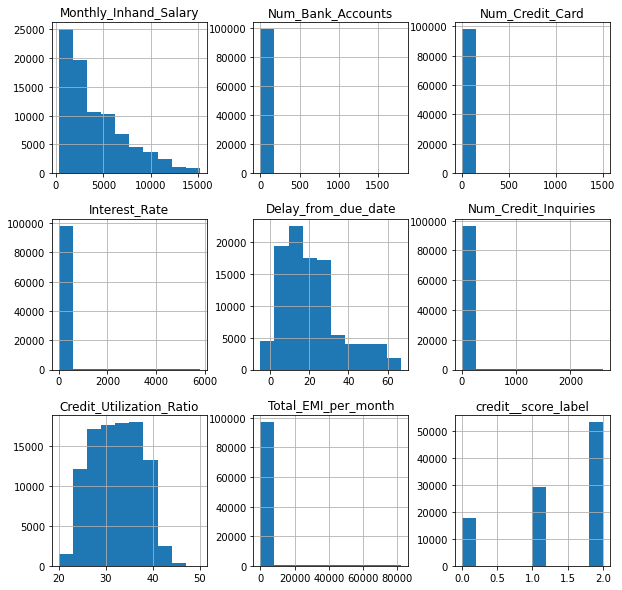

In [111]:
df.hist(figsize=(10,10))

In [112]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'credit__score_label'],
      dtype='object')

here a lot of columns are out of model scope ,redundant and not so useful in this particular context of the issue at the hand so we have to drop them,name column was already dropped

In [113]:
#Drop the column 

drop_df = df.drop(['ID','Customer_ID','Month','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Amount_invested_monthly'], axis=1).copy()
drop_df

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,credit__score_label
0,23,Scientist,19114.12,3,7,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,0
1,23,Scientist,19114.12,-1,NaN,4.0,Good,809.98,31.944960,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,0
2,-500,Scientist,19114.12,3,7,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,0
3,23,Scientist,19114.12,5,4,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,0
4,23,Scientist,19114.12,6,NaN,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,23,7,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,1
99996,25,Mechanic,39628.99,18,7,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,1
99997,25,Mechanic,39628.99,27,6,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,1
99998,25,Mechanic,39628.99,20,NaN,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,2


In [114]:
drop_df["Age"]

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object

In [115]:
non_numeric_age = drop_df[~drop_df["Age"].str.isnumeric()]

In [116]:
non_numeric_age

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,credit__score_label
2,-500,Scientist,19114.12,3,7,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,0
8,28_,_______,34847.84,3,4,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,Low_spent_Small_value_payments,470.69062692529184,2
54,34_,Lawyer,10909427.0,0,2_,4.0,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,!@9#%8,326.24183015224526,0
58,30_,Media_Manager,34081.38,31,14,5.0,Standard,1704.18,35.111552,14 Years and 9 Months,Yes,70.478333,Low_spent_Large_value_payments,260.9124018324295,1
71,24_,Doctor,114838.41,11,11,8.0,Good,1377.74,27.813354,21 Years and 11 Months,No,226.892792,High_spent_Large_value_payments,742.9221908300779,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99933,38_,Manager,15319.65,54,16,6.0,Bad,1453.61,24.846424,11 Years and 2 Months,Yes,28.182033,High_spent_Small_value_payments,332.269998,2
99937,-500,_______,22620.79,25,NaN,2.0,Standard,642.46,31.841872,NaN,No,0.000000,Low_spent_Large_value_payments,337.13029,2
99942,48_,Developer,22620.79,27,17,2.0,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,High_spent_Large_value_payments,395.674395,1
99963,-500,Lawyer,42903.79,14,0,1.0,Good,1079.48,30.625298,NaN,No,34.975457,High_spent_Large_value_payments,520.662207,2


In [117]:
def covage(age):
    for i in range(len(age)):
        if age[i][-1]=="_":
            age[i]=age[i][:-1]

In [118]:
type(df["Age"])

pandas.core.series.Series

In [119]:
covage(drop_df["Age"])

/tmp/ipykernel_25151/783938925.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[i]=age[i][:-1]


In [120]:
drop_df["Age"]

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object

In [121]:
non_numeric_age = drop_df[~drop_df["Age"].str.isnumeric()]

In [122]:
non_numeric_age

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,credit__score_label
2,-500,Scientist,19114.12,3,7,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,0
113,-500,Entrepreneur,25546.26,16,13,NaN,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,Low_spent_Small_value_payments,129.9336309554582,2
289,-500,Mechanic,29469.98,50,18,NaN,Bad,3421.66,30.268411,13 Years and 3 Months,NM,69.685459,High_spent_Small_value_payments,287.6059398340756,2
340,-500,Architect,20574.47,6,7,11.0,Standard,749.95,29.036164,11 Years and 3 Months,Yes,49.348666,Low_spent_Large_value_payments,254.72668807344257,2
560,-500,Scientist,144546.72,15,7,1.0,Good,1045.11,40.840687,22 Years and 11 Months,No,136.988557,High_spent_Small_value_payments,730.5558529037837,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99531,-500,Lawyer,8974.555,21,24,7.0,Bad,1660.14,22.173985,16 Years and 6 Months,Yes,30.443262,Low_spent_Medium_value_payments,300.106469,1
99541,-500,Scientist,34671.15,21,19,4.0,Standard,1071.97,25.076571,21 Years and 8 Months,Yes,52.337589,High_spent_Small_value_payments,366.605518,2
99762,-500,Accountant,17818.6,25,15_,3.0,Standard,301.52,26.398987,18 Years and 5 Months,NM,11.581102,High_spent_Medium_value_payments,369.426905,2
99937,-500,_______,22620.79,25,NaN,2.0,Standard,642.46,31.841872,NaN,No,0.000000,Low_spent_Large_value_payments,337.13029,2


In [123]:
non_numeric_age["Age"].value_counts()

-500    886
Name: Age, dtype: int64

trial

In [124]:
xy=non_numeric_age.copy()

In [125]:
xy["Age"]=non_numeric_age["Age"].replace("-500","NULL")

In [126]:
xy

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,credit__score_label
2,NULL,Scientist,19114.12,3,7,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,0
113,NULL,Entrepreneur,25546.26,16,13,NaN,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,Low_spent_Small_value_payments,129.9336309554582,2
289,NULL,Mechanic,29469.98,50,18,NaN,Bad,3421.66,30.268411,13 Years and 3 Months,NM,69.685459,High_spent_Small_value_payments,287.6059398340756,2
340,NULL,Architect,20574.47,6,7,11.0,Standard,749.95,29.036164,11 Years and 3 Months,Yes,49.348666,Low_spent_Large_value_payments,254.72668807344257,2
560,NULL,Scientist,144546.72,15,7,1.0,Good,1045.11,40.840687,22 Years and 11 Months,No,136.988557,High_spent_Small_value_payments,730.5558529037837,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99531,NULL,Lawyer,8974.555,21,24,7.0,Bad,1660.14,22.173985,16 Years and 6 Months,Yes,30.443262,Low_spent_Medium_value_payments,300.106469,1
99541,NULL,Scientist,34671.15,21,19,4.0,Standard,1071.97,25.076571,21 Years and 8 Months,Yes,52.337589,High_spent_Small_value_payments,366.605518,2
99762,NULL,Accountant,17818.6,25,15_,3.0,Standard,301.52,26.398987,18 Years and 5 Months,NM,11.581102,High_spent_Medium_value_payments,369.426905,2
99937,NULL,_______,22620.79,25,NaN,2.0,Standard,642.46,31.841872,NaN,No,0.000000,Low_spent_Large_value_payments,337.13029,2


trial end

In [127]:
drop_df["Age"].replace("-500","NULL",inplace=True)

In [128]:
drop_df["Age"]

0          23
1          23
2        NULL
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object

In [129]:
drop_df["Age"] = pd.to_numeric(drop_df["Age"], errors="coerce")

In [130]:
drop_df["Age"]

0        23.0
1        23.0
2         NaN
3        23.0
4        23.0
         ... 
99995    25.0
99996    25.0
99997    25.0
99998    25.0
99999    25.0
Name: Age, Length: 100000, dtype: float64

In [131]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       99114 non-null   float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Delay_from_due_date       100000 non-null  int64  
 4   Num_of_Delayed_Payment    92998 non-null   object 
 5   Num_Credit_Inquiries      98035 non-null   float64
 6   Credit_Mix                100000 non-null  object 
 7   Outstanding_Debt          100000 non-null  object 
 8   Credit_Utilization_Ratio  100000 non-null  float64
 9   Credit_History_Age        90970 non-null   object 
 10  Payment_of_Min_Amount     100000 non-null  object 
 11  Total_EMI_per_month       100000 non-null  float64
 12  Payment_Behaviour         100000 non-null  object 
 13  Monthly_Balance           98800 non-null   ob

In [132]:
drop_df.dropna(subset=["Age"],inplace=True)
drop_df.reset_index(drop=True, inplace=True)

In [133]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99114 entries, 0 to 99113
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       99114 non-null  float64
 1   Occupation                99114 non-null  object 
 2   Annual_Income             99114 non-null  object 
 3   Delay_from_due_date       99114 non-null  int64  
 4   Num_of_Delayed_Payment    92166 non-null  object 
 5   Num_Credit_Inquiries      97173 non-null  float64
 6   Credit_Mix                99114 non-null  object 
 7   Outstanding_Debt          99114 non-null  object 
 8   Credit_Utilization_Ratio  99114 non-null  float64
 9   Credit_History_Age        90160 non-null  object 
 10  Payment_of_Min_Amount     99114 non-null  object 
 11  Total_EMI_per_month       99114 non-null  float64
 12  Payment_Behaviour         99114 non-null  object 
 13  Monthly_Balance           97920 non-null  object 
 14  credit

In [134]:
drop_df["Age"]

0        23.0
1        23.0
2        23.0
3        23.0
4        23.0
         ... 
99109    25.0
99110    25.0
99111    25.0
99112    25.0
99113    25.0
Name: Age, Length: 99114, dtype: float64

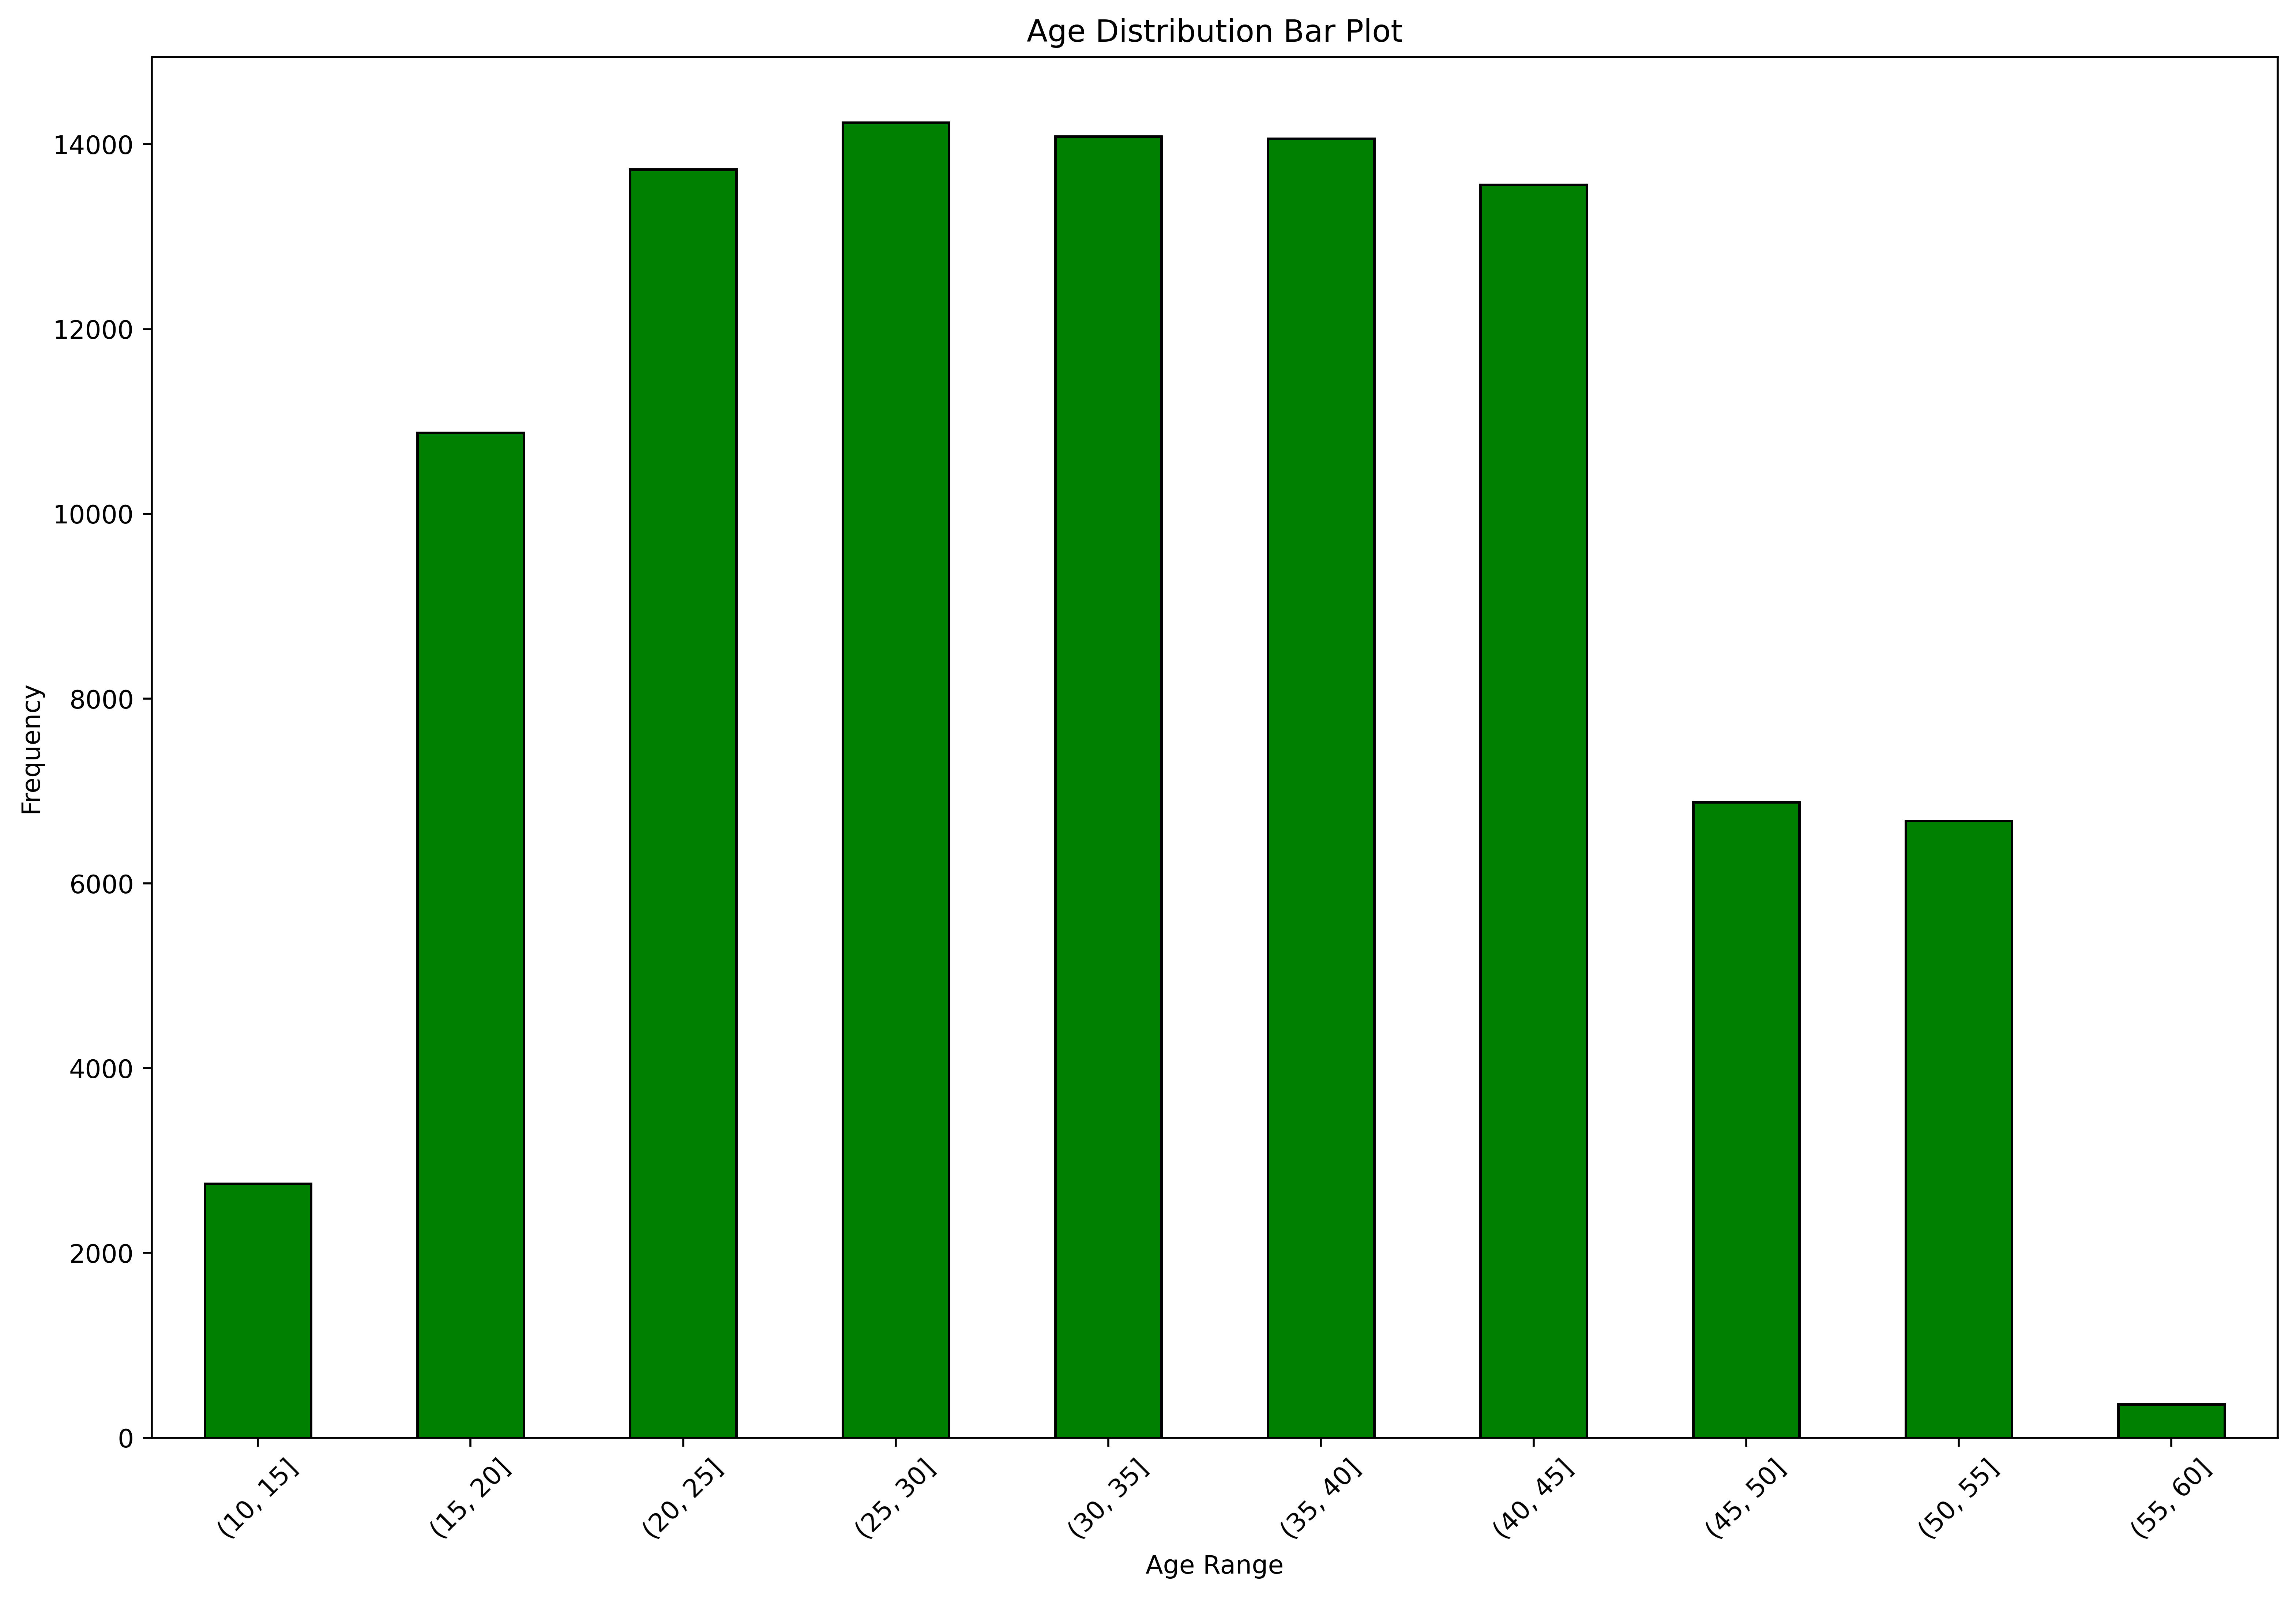

In [135]:
age_bins = range(10,65,5)  # Define your age ranges
plt.figure(figsize=(15,10),dpi=500)

# Use pd.cut to categorize ages into bins and get the frequency count
delay_ranges = pd.cut(drop_df["Age"], bins=age_bins)
delay_counts = delay_ranges.value_counts().sort_index()

# Create a bar plot
delay_counts.plot(kind='bar', color='green', edgecolor='black')

# Customize the plot
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.title('Age Distribution Bar Plot')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [136]:
drop_df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99114 entries, 0 to 99113
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       99114 non-null  float64
 1   Occupation                99114 non-null  object 
 2   Annual_Income             99114 non-null  object 
 3   Delay_from_due_date       99114 non-null  int64  
 4   Num_of_Delayed_Payment    92166 non-null  object 
 5   Num_Credit_Inquiries      97173 non-null  float64
 6   Credit_Mix                99114 non-null  object 
 7   Outstanding_Debt          99114 non-null  object 
 8   Credit_Utilization_Ratio  99114 non-null  float64
 9   Credit_History_Age        90160 non-null  object 
 10  Payment_of_Min_Amount     99114 non-null  object 
 11  Total_EMI_per_month       99114 non-null  float64
 12  Payment_Behaviour         99114 non-null  object 
 13  Monthly_Balance           97920 non-null  object 
 14  credit

In [137]:
drop_df["Occupation"].value_counts()

_______          7001
Lawyer           6505
Architect        6303
Engineer         6295
Scientist        6238
Mechanic         6229
Accountant       6221
Media_Manager    6176
Developer        6169
Teacher          6153
Entrepreneur     6134
Journalist       6036
Doctor           6025
Manager          5932
Musician         5857
Writer           5840
Name: Occupation, dtype: int64

In [138]:
drop_df["Occupation"].replace("_______","other",inplace=True)

In [139]:
drop_df["Occupation"].value_counts()

other            7001
Lawyer           6505
Architect        6303
Engineer         6295
Scientist        6238
Mechanic         6229
Accountant       6221
Media_Manager    6176
Developer        6169
Teacher          6153
Entrepreneur     6134
Journalist       6036
Doctor           6025
Manager          5932
Musician         5857
Writer           5840
Name: Occupation, dtype: int64

In [140]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
drop_df["Occupation"]=lb.fit_transform(drop_df["Occupation"])

In [141]:
drop_df["Occupation"].value_counts()

15    7001
7     6505
1     6303
4     6295
12    6238
9     6229
0     6221
10    6176
2     6169
13    6153
5     6134
6     6036
3     6025
8     5932
11    5857
14    5840
Name: Occupation, dtype: int64

In [142]:
drop_df

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,credit__score_label
0,23.0,12,19114.12,3,7,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,0
1,23.0,12,19114.12,-1,NaN,4.0,Good,809.98,31.944960,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,0
2,23.0,12,19114.12,5,4,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,0
3,23.0,12,19114.12,6,NaN,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,0
4,23.0,12,19114.12,8,4,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,!@9#%8,340.4792117872438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99109,25.0,9,39628.99,23,7,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,1
99110,25.0,9,39628.99,18,7,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,1
99111,25.0,9,39628.99,27,6,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,1
99112,25.0,9,39628.99,20,NaN,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,2


In [169]:
krna=['Age', 'Occupation', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']

In [144]:
drop_df["Delay_from_due_date"].value_counts().sort_index()

-5      33
-4      61
-3     117
-2     167
-1     208
      ... 
 63     68
 64     63
 65     55
 66     31
 67     22
Name: Delay_from_due_date, Length: 73, dtype: int64

In [145]:
drop_df["Delay_from_due_date"].isnull().sum()

0

In [146]:
drop_df["Num_of_Delayed_Payment"].isnull().sum()

6948

Here the Num_of_Delayed_Payment columns has around 7k null values dropping them dirctly could mean a significant data loss.
Also directly imputating it with mean is also a bad idea consdering the fact that it could be depended on some other factor.
So insted we will see the correleation of this column with other variables and then decide which column should be used to take out some metric.

In [147]:

drop_df["Num_of_Delayed_Payment"] = pd.to_numeric(drop_df["Num_of_Delayed_Payment"], errors="coerce")

In [148]:
drop_df

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,credit__score_label
0,23.0,12,19114.12,3,7.0,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,0
1,23.0,12,19114.12,-1,NaN,4.0,Good,809.98,31.944960,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,0
2,23.0,12,19114.12,5,4.0,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,0
3,23.0,12,19114.12,6,NaN,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,0
4,23.0,12,19114.12,8,4.0,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,!@9#%8,340.4792117872438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99109,25.0,9,39628.99,23,7.0,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,1
99110,25.0,9,39628.99,18,7.0,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,1
99111,25.0,9,39628.99,27,6.0,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,1
99112,25.0,9,39628.99,20,NaN,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,2


In [149]:
drop_df = drop_df[drop_df['Num_of_Delayed_Payment'] >= 0]

In [150]:
drop_df.isna().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Num_Credit_Inquiries        1737
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          8019
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Payment_Behaviour              0
Monthly_Balance             1051
credit__score_label            0
dtype: int64

In [151]:
drop_df["Num_Credit_Inquiries"].isnull().sum()

1737

-wait for other columns then take out correlation

<Axes: >

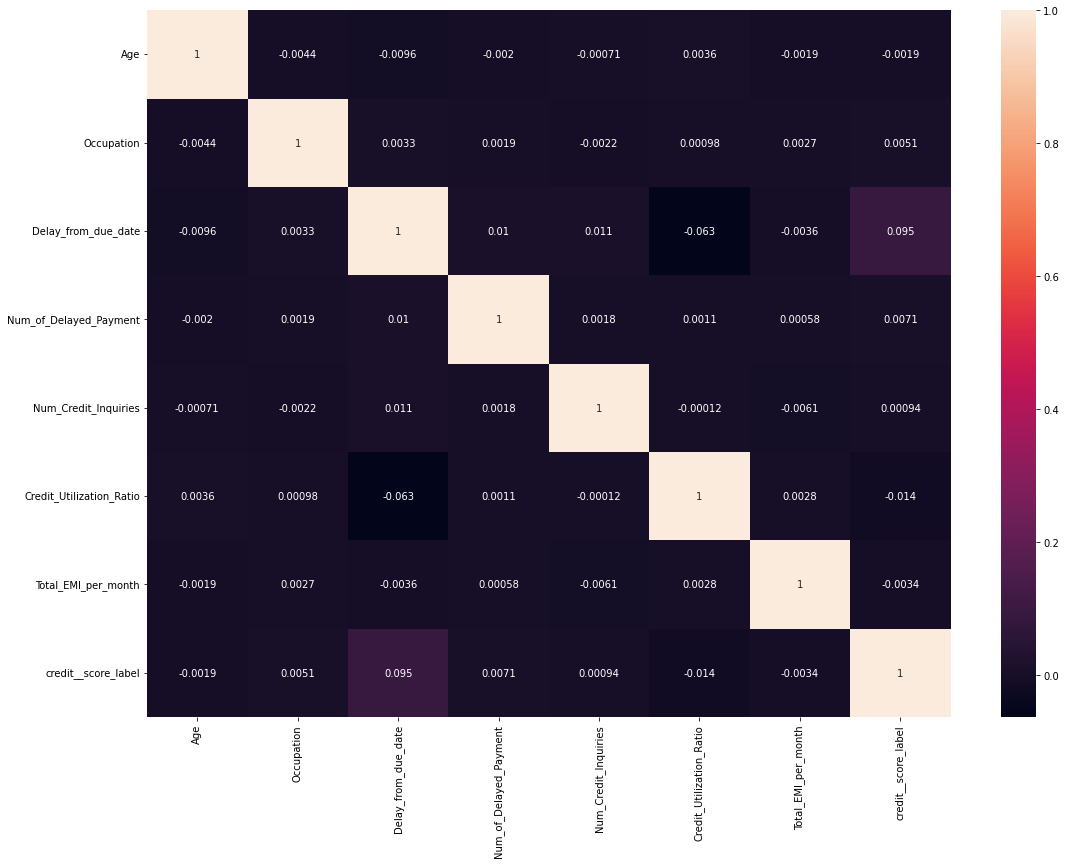

In [152]:
plt.figure(figsize=(18,13))
sns.heatmap(drop_df.corr(),annot=True)

In [153]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88838 entries, 0 to 99113
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       88838 non-null  float64
 1   Occupation                88838 non-null  int64  
 2   Annual_Income             88838 non-null  object 
 3   Delay_from_due_date       88838 non-null  int64  
 4   Num_of_Delayed_Payment    88838 non-null  float64
 5   Num_Credit_Inquiries      87101 non-null  float64
 6   Credit_Mix                88838 non-null  object 
 7   Outstanding_Debt          88838 non-null  object 
 8   Credit_Utilization_Ratio  88838 non-null  float64
 9   Credit_History_Age        80819 non-null  object 
 10  Payment_of_Min_Amount     88838 non-null  object 
 11  Total_EMI_per_month       88838 non-null  float64
 12  Payment_Behaviour         88838 non-null  object 
 13  Monthly_Balance           87787 non-null  object 
 14  credit

In [154]:
# drop_df["Annual_Income"] = pd.to_numeric(drop_df["Annual_Income"], errors="coerce")

In [155]:
drop_df["Annual_Income"].value_counts()

17273.83      16
20867.67      16
33029.66      15
40341.16      14
95596.35      13
              ..
12763.795_     1
34281.92_      1
11391511.0     1
38750.41_      1
39628.99_      1
Name: Annual_Income, Length: 18318, dtype: int64

In [156]:
drop_df.reset_index(drop=True, inplace=True)

In [157]:
covage(drop_df["Annual_Income"])

/tmp/ipykernel_25151/783938925.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[i]=age[i][:-1]


In [164]:
drop_df["Annual_Income"] = pd.to_numeric(drop_df["Annual_Income"], errors="coerce")

/tmp/ipykernel_25151/1600592102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df["Annual_Income"] = pd.to_numeric(drop_df["Annual_Income"], errors="coerce")


In [166]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88838 entries, 0 to 88837
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       88838 non-null  float64
 1   Occupation                88838 non-null  int64  
 2   Annual_Income             88838 non-null  float64
 3   Delay_from_due_date       88838 non-null  int64  
 4   Num_of_Delayed_Payment    88838 non-null  float64
 5   Num_Credit_Inquiries      87101 non-null  float64
 6   Credit_Mix                88838 non-null  object 
 7   Outstanding_Debt          88838 non-null  object 
 8   Credit_Utilization_Ratio  88838 non-null  float64
 9   Credit_History_Age        80819 non-null  object 
 10  Payment_of_Min_Amount     88838 non-null  object 
 11  Total_EMI_per_month       88838 non-null  float64
 12  Payment_Behaviour         88838 non-null  object 
 13  Monthly_Balance           87787 non-null  object 
 14  credit

In [168]:
drop_df["Annual_Income"].isnull().sum()

0

In [170]:
krna

['Age',
 'Occupation',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries']